In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from scipy.interpolate import make_interp_spline, CubicSpline, make_smoothing_spline
import loess
from scipy.signal import savgol_filter
from matplotlib.patches import Rectangle 
from matplotlib.path import Path
import matplotlib.patheffects as patheffects

In [10]:
x1 = np.random.beta(3.5,1.5, 50000000)
x2 = np.random.beta(1.5,3.5, 50000000)
y1 = np.histogram(x1, bins=400)
y2 = np.histogram(x2, bins=400)

y1_ = y1[0]/sum(y1[0])
x1_ = (y1[1][0:(len(y1[1])-1)])
y1_ = np.append(y1_, [0])
x1_ = np.append(x1_, [1])

y2_ = y2[0]/sum(y2[0])
x2_ = (y2[1][0:(len(y2[1])-1)])
y2_ = np.insert(y2_, 0, 0, axis=0)
x2_ = np.insert(x2_, 0, 0, axis=0)

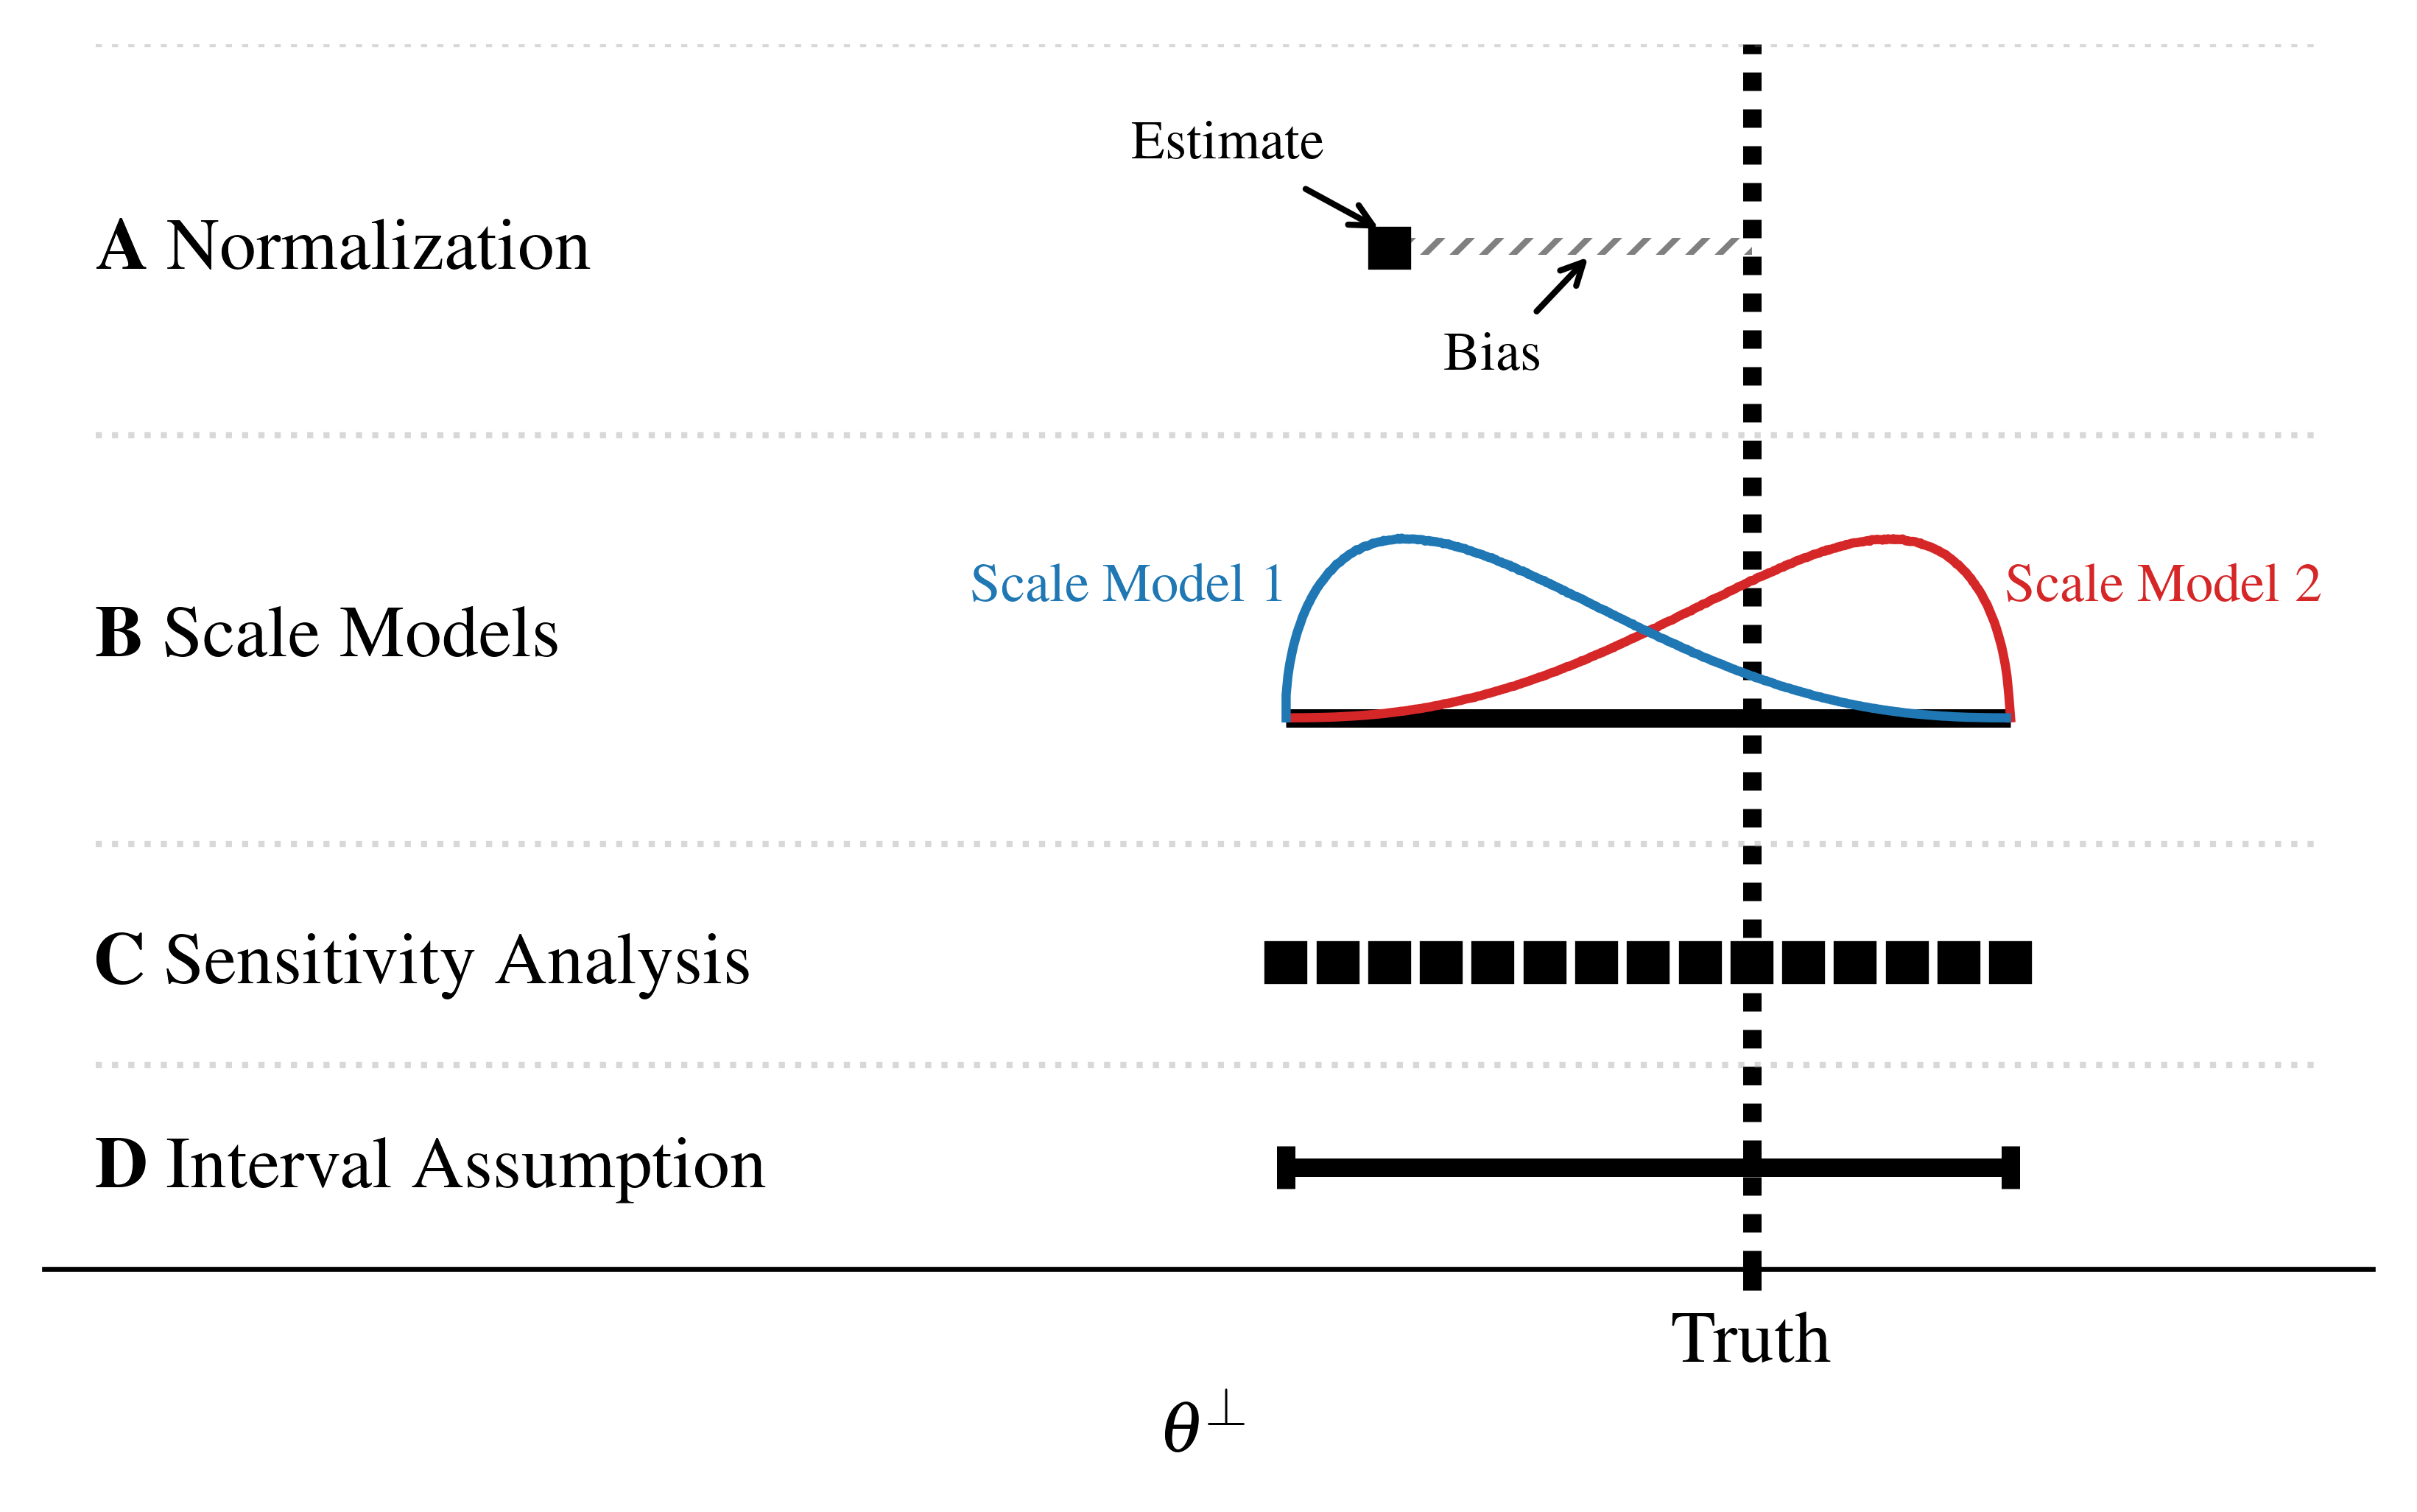

In [11]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

width = 6.8
height = 3.6
dpi = 600
pw = width*dpi
ph = height*dpi

fig, ax = plt.subplots(figsize=(pw/dpi, ph/dpi), dpi=dpi)

ax.set_xlim(-0.75, 1.5)
ax.set_ylim(-0, 1.8)

truth = 0.9
ax.axvline(truth, color="black", linestyle=(0,(1,1)), linewidth=3)
ax.spines[['left', 'right', 'top']].set_visible(False)

## Normalization
y_point = 1.5
ax.hlines(y=y_point+0.3, xmin=-0.7, xmax=1.45, linewidth=1, color='grey', linestyle="dotted", alpha=0.3)
ax.annotate(r"\textbf{A} Normalization", xy=(-0.7, y_point-0.03), usetex=True, fontsize=12)
x_point = 0.55
ax.plot(x_point, y_point, "s", c="black")
ax.add_patch(Rectangle((x_point+0.02, y_point-0.01), truth-x_point-0.02, 0.025, fill=False, hatch="/////", linewidth=0, color="gray"))
ax.annotate("Estimate", xy=(x_point, y_point+0.02), xytext=(0.3, y_point+0.15),
            arrowprops=dict(facecolor="black", arrowstyle="->"),
            ha="left", va="center", fontsize=9)
ax.annotate("Bias", xy=(x_point+(x_point/2.75), y_point), xytext=(0.65, y_point-.16),
            arrowprops=dict(facecolor="black", arrowstyle="->"),
            ha="center", va="center", fontsize=9)
ax.hlines(y=y_point-0.275, xmin=-0.7, xmax=1.45, linewidth=1, color='grey', linestyle="dotted", alpha=0.3)

## Scale Models
y_point = 0.9
ax.annotate(r"\textbf{B} Scale Models", xy=(-0.7, y_point), usetex=True, fontsize=12)
ax.errorbar(truth-0.1, y_point-0.09, xerr=0.35, capsize=0, capthick=3, elinewidth=3, color="black")
x1_p = x1_*0.7
y1_p = y1_*50
x1_p = x1_p + truth-0.1-0.35
y1_p = y1_p + y_point - 0.09
ax.plot(x1_p, y1_p, color="#D62728")
x2_p = x2_*0.7
y2_p = y2_*50
x2_p = x2_p + truth-0.1-0.35
y2_p = y2_p + y_point - 0.09
ax.plot(x2_p, y2_p, color="#1f77b4")
ax.annotate("Scale Model 2", xy=(1.3, y_point+0.1),
            color="#D62728", ha="center", va="center", fontsize=9)
ax.annotate("Scale Model 1", xy=(0.3, y_point+0.1),
            color="#1f77b4", ha="center", va="center", fontsize=9)
ax.hlines(y=y_point-0.275, xmin=-0.7, xmax=1.45, linewidth=1, color='grey', linestyle="dotted", alpha=0.3)

## Sensitivity Analysis
y_point = 0.45
ax.annotate(r"\textbf{C} Sensitivity Analysis", xy=(-0.7, y_point-0.03), usetex=True, fontsize=12)
for x_point in np.arange(0.45, 1.2, 0.05):
    if x_point==0.55:
        ax.plot(x_point, y_point, "s", c="black")
    else:
        ax.plot(x_point, y_point, "s", c="black")
#ax.annotate("One Estimate", xy=(0.55, y_point+0.02), xytext=(0.2, y_point+0.15),
#            arrowprops=dict(facecolor="black", arrowstyle="->"),
#            ha="left", va="center", fontsize=9)
#ax.annotate("Another Estimate", xy=(1, y_point-0.02), xytext=(0.95, y_point-0.15),
#            arrowprops=dict(facecolor="black", arrowstyle="->"),
#            ha="left", va="center", fontsize=9)
#ax.annotate("Estimate", xy=(1, y_point-0.02), xytext=(0.95, y_point-0.15),
#            arrowprops=dict(facecolor="black", arrowstyle="->"),
#            ha="left", va="center", fontsize=9)
ax.hlines(y=y_point-0.15, xmin=-0.7, xmax=1.45, linewidth=1, color='grey', linestyle="dotted", alpha=0.3)

## Interval Assumption
y_point = 0.15
ax.annotate(r"\textbf{D}   Interval Assumption", xy=(-0.7, y_point-0.03), usetex=True, fontsize=12)
ax.errorbar(truth-0.1, y_point, xerr=0.35, capsize=3.5, capthick=3, elinewidth=3, color="black")

ax.get_yaxis().set_visible(False)
ax.set_xlabel("$\\theta^\\perp$", fontsize=12)
ax.set_xticks([truth])
ax.set_xticklabels(["Truth"], weight="bold", fontsize=12)
ax.xaxis.set_tick_params(width=3)

In [12]:
fig.savefig("../../figures/Figure_1.png", bbox_inches='tight')